In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from itertools import product

In [2]:
def zrot(angle):
    return R.from_euler('z', angle)

def yrot(angle):
    return R.from_euler('y', angle)

In [3]:
def construct_prod(zangles, alpha):
    if len(zangles) == 0:
        return yrot(alpha).as_matrix()
    W = R.identity()
    if type(zangles) != list:
        zangles = [zangles]
    for theta in zangles[:-1]:
        W *= zrot(theta) * yrot(alpha)
    W *= zrot(zangles[-1])
    return W.as_matrix()

def matrix_diff(zangles, alpha, beta):
    zrots = construct_prod(zangles, alpha)
    if len(zangles) == 0:
        yrots = yrot(beta).as_matrix()
    else:
        yrots = yrot(beta).as_matrix()
    return np.linalg.norm(zrots - yrots)

In [4]:
def allowed_angles(m, num_points=20, tolerance=1e-10):
    alphas, betas = [], []
    domain = np.linspace(0, 2*np.pi, num_points)
    params = product(domain, repeat=m + 2)
    for *thetas, alpha, beta in params:
        diff = matrix_diff(thetas, alpha, beta)
        if diff < tolerance:
            alphas.append(alpha)
            betas.append(beta)
    
    return alphas, betas

In [17]:
a0, b0 = allowed_angles(0, num_points=40, tolerance=1e-4)

Text(0.5, 1.0, 'Parameters making $S_0 = \\mathsf{SU}(2)$')

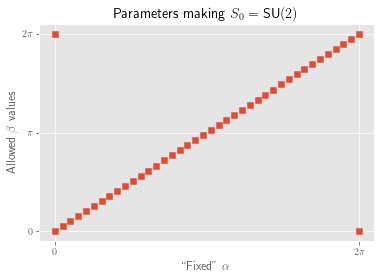

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(a0, b0, marker='s')

ax.set_xticks([0, 2 * np.pi])
ax.set_xticklabels(["$0$", "$2\pi$"])
ax.set_yticks([0, np.pi, 2 * np.pi])
ax.set_yticklabels(["$0$", "$\pi$", "$2\pi$"])

ax.set_xlabel(r"``Fixed'' $\alpha$")
ax.set_ylabel(r'Allowed $\beta$ values')
ax.set_title(r'Parameters making $S_0 = \mathsf{SU}(2)$')

# plt.savefig('./s0.pdf')

In [20]:
a1, b1 = allowed_angles(1, num_points=40, tolerance=1e-5)

Text(0.5, 1.0, 'Parameters making $S_1 = \\mathsf{SU}(2)$')

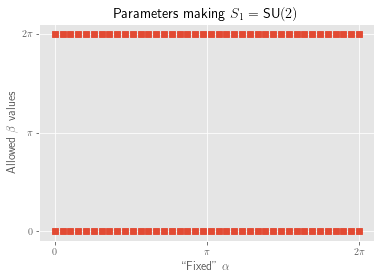

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(a1, b1, marker='s')

ax.set_xticks([0, np.pi, 2 * np.pi])
ax.set_xticklabels(["$0$", "$\pi$", "$2\pi$"])
ax.set_yticks([0, np.pi, 2 * np.pi])
ax.set_yticklabels(["$0$", "$\pi$", "$2\pi$"])

ax.set_xlabel(r"``Fixed'' $\alpha$")
ax.set_ylabel(r'Allowed $\beta$ values')
ax.set_title(r'Parameters making $S_1 = \mathsf{SU}(2)$')

# plt.savefig('./s1.pdf')

In [5]:
a2, b2 = allowed_angles(2, num_points=20, tolerance=1e-5)

Text(0.5, 1.0, 'Parameters making $S_2 = \\mathsf{SU}(2)$')

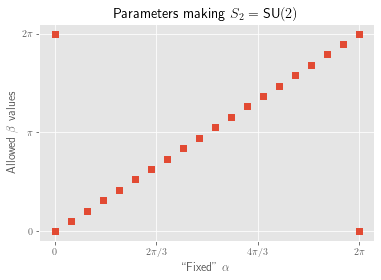

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(a2, b2, marker='s')

ax.set_xticks([0, 2 * np.pi / 3, 4 * np.pi / 3, 2 * np.pi])
ax.set_xticklabels(["$0$", r"$2\pi / 3$", "$4\pi / 3$", "$2\pi$"])
ax.set_yticks([0, np.pi, 2 * np.pi])
ax.set_yticklabels(["$0$", r"$\pi$", "$2\pi$"])

ax.set_xlabel(r"``Fixed'' $\alpha$")
ax.set_ylabel(r'Allowed $\beta$ values')
ax.set_title(r'Parameters making $S_2 = \mathsf{SU}(2)$')

# plt.savefig('./s2.pdf')

In [7]:
a3, b3 = allowed_angles(3, num_points=10)

Text(0.5, 1.0, 'Parameters making $S_3 = \\mathsf{SU}(2)$')

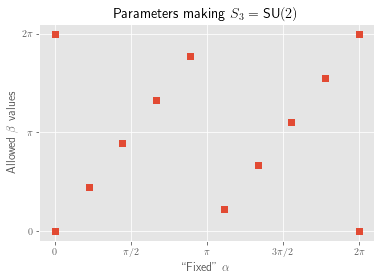

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(a3, b3, marker='s')

ax.set_xticks(     [0,      np.pi / 2,     np.pi, 3 * np.pi / 2,  2 * np.pi])
ax.set_xticklabels(["$0$", r"$\pi / 2$", "$\pi$",    "$3\pi / 2$", "$2\pi$"])
ax.set_yticks([0, np.pi, 2 * np.pi])
ax.set_yticklabels(["$0$", r"$\pi$", "$2\pi$"])

ax.set_xlabel(r"``Fixed'' $\alpha$")
ax.set_ylabel(r'Allowed $\beta$ values')
ax.set_title(r'Parameters making $S_3 = \mathsf{SU}(2)$')

# plt.savefig('./s3.pdf')

## The rest of the file was for testing purposes!

In [70]:
test = [ (1, 2, 3), (1, 2, 3), (4, 5, 6)]
for *thetas, b in test:
    print(thetas)

[1, 2]
[1, 2]
[4, 5]


In [26]:
max_riffle = 2
num_points = 20
epsilon = 1e-8

uspace, vspace = np.linspace(0, 2*np.pi, num_points), np.linspace(0, 2*np.pi, num_points)
theta_space = np.linspace(0, 2*np.pi, num_points)
domain = np.linspace(0, 2*np.pi, num_points)

In [27]:
uu, vv, theta = np.meshgrid(domain, domain, domain, indexing='ij')
allowed = []
for i in range(num_points):
    for j in range(num_points):
        for k in range(num_points):
            alpha, beta = uu[i, j, k], vv[i, j, k]
            zangle = theta[i, j, k]
            yangle = beta
            yrot = R.from_euler('y', yangle).as_matrix()
            zrot = R.from_euler('z', zangle).as_matrix()
            diff = np.linalg.norm(zrot - yrot)
            if diff < epsilon:
                allowed.append((alpha, beta))
#                 print(f'worked for alpha = {alpha}, beta = {beta}, theta = {zangle} with diff = {diff}')

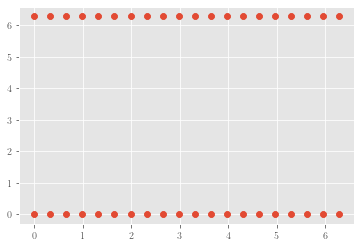

In [28]:
plt.scatter(*zip(*allowed))

In [29]:
uu, vv, theta1, theta2 = np.meshgrid(domain, domain, domain, domain, indexing='ij')
allowed2 = []
for i in range(num_points):
    for j in range(num_points):
        for k in range(num_points):
            for l in range(num_points):
                alpha, beta = uu[i, j, k, l], vv[i, j, k, l]
                zangle1, zangle2 = theta1[i, j, k, l], theta2[i, j, k, l]
                yangle = beta
                lhs = (R.from_euler('z', zangle1) * R.from_euler('y', alpha) * R.from_euler('z', zangle2)).as_matrix()
                rhs = R.from_euler('y', yangle).as_matrix()
                diff = np.linalg.norm(lhs - rhs)
                if diff < epsilon:
                    allowed2.append((alpha, beta))
#                     print(f'worked for alpha = {alpha}, beta = {beta}, theta = {zangle} with diff = {diff}')

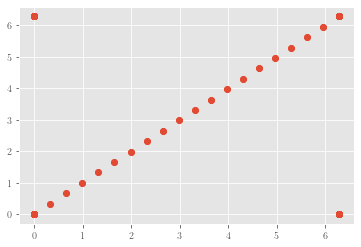

In [30]:
plt.scatter(*zip(*allowed2))

In [59]:
uu, vv, theta1, theta2, theta3 = np.meshgrid(domain, domain, domain, domain, domain, indexing='ij')
allowed3 = []
for i in range(num_points):
    for j in range(num_points):
        for k in range(num_points):
            for l in range(num_points):
                for n in range(num_points):
                    alpha, beta = uu[i, j, k, l, n], vv[i, j, k, l, n]
                    zangle1, zangle2, zangle3 = theta1[i, j, k, l, n], theta2[i, j, k, l, n], theta3[i, j, k, l, n]
                    yangle = beta - 2 * alpha
                    lhs = (R.from_euler('z', zangle1) * R.from_euler('y', alpha) * R.from_euler('z', zangle2) * R.from_euler('y', alpha) * R.from_euler('z', zangle3)).as_matrix()
                    rhs = R.from_euler('y', yangle).as_matrix()
                    diff = np.linalg.norm(lhs - rhs)
                    if diff < epsilon:
                        allowed3.append((alpha, beta))
    #                     print(f'worked for alpha = {alpha}, beta = {beta}, theta = {zangle} with diff = {diff}')

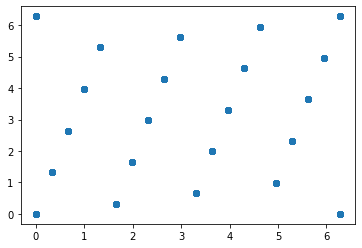

In [60]:
plt.scatter(*zip(*allowed3))